In [1]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/cardio.csv', sep=';')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [2]:
# age is in days
# Checking null values
null_val = df.info()
print(null_val)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
id             70000 non-null int64
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


In [3]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# number of patients with heart diseases
disease_count = df['cardio'].value_counts()
disease_count

0    35021
1    34979
Name: cardio, dtype: int64

##### 34979 people having heart disease problems

In [5]:
# converting age in days to years
df['age_Y'] = df['age'] / 365 
df['age_Y']

0        50.391781
1        55.419178
2        51.663014
3        48.282192
4        47.873973
           ...    
69995    52.712329
69996    61.920548
69997    52.235616
69998    61.454795
69999    56.273973
Name: age_Y, Length: 70000, dtype: float64

In [6]:
df['age_Y'] = df['age_Y'].round(0)
df['age_Y']

0        50.0
1        55.0
2        52.0
3        48.0
4        48.0
         ... 
69995    53.0
69996    62.0
69997    52.0
69998    61.0
69999    56.0
Name: age_Y, Length: 70000, dtype: float64

In [7]:
df['age'] = df['age_Y']
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_Y
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0,53.0
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1,62.0
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1,52.0
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1,61.0


In [8]:
df['age'] = pd.to_numeric(df['age'], downcast='integer')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_Y
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,50.0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,55.0
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,52.0
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,48.0
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0,53.0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1,62.0
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1,52.0
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1,61.0


In [9]:
df = df.drop('age_Y', axis=1)
svm_df = df.copy()
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61,1,163,72.0,135,80,1,2,0,0,0,1


In [10]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003050,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003050,1.000000,-0.023017,-0.081456,0.053661,0.020793,0.017754,0.154386,0.098596,-0.047884,-0.029918,-0.009819,0.237749
gender,0.003502,-0.023017,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081456,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053661,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020793,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017754,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154386,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098596,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047884,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


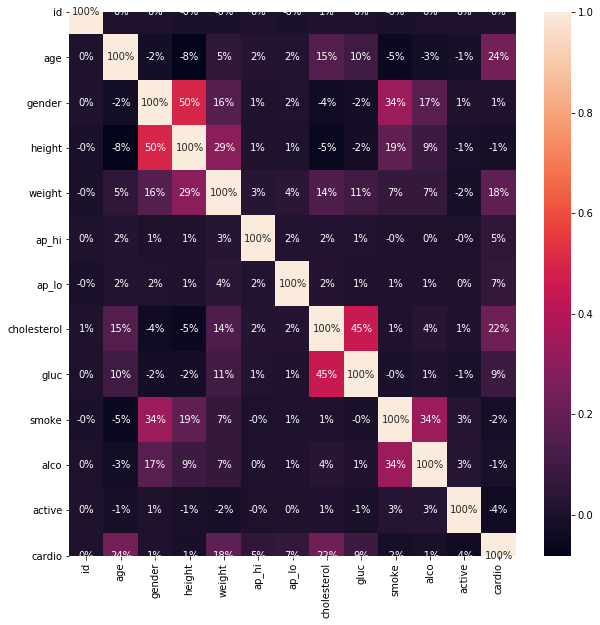

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [12]:
# Feature data and target data
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

# scaling values to be in between 0 and 1
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

clf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1)
clf.fit(X_train, Y_train)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [13]:
clf.score(X_train, Y_train)

0.9808380952380953

In [14]:
clf.score(X_test, Y_test)


0.6977142857142857

In [15]:
prediction = clf.predict(X_test)
prediction

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [16]:
heart_disease = []
for value in prediction:
    if value == 1:
        heart_disease.append('yes')
    else:
        heart_disease.append('no')
heart_disease

['yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',

In [27]:
df['heart_patient'] = pd.DataFrame(heart_disease)
df.head(100)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,heart_patient
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,yes
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,no
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,yes
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,yes
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,129,58,1,158,53.0,110,70,1,1,0,0,1,0,yes
96,131,53,2,165,65.0,110,70,1,1,0,0,1,0,no
97,132,50,1,165,99.0,150,110,1,1,0,0,0,1,no
98,133,60,2,170,100.0,120,80,1,1,0,0,0,1,no


In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, clf.predict(X_test))
cm

array([[6650, 1959],
       [3331, 5560]], dtype=int64)

In [19]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear', C=1, gamma='auto')
clf_svm.fit(X_train, Y_train)

clf_svm.score(X_train, Y_train)

0.7232952380952381

In [20]:
clf_svm.score(X_test, Y_test)

0.7201714285714286

In [21]:
svm_predict = clf_svm.predict(X_test)
svm_predict

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [33]:
heart_diseaseSVM = []
for value in prediction:
    if value == 1:
        heart_diseaseSVM.append('yes')
    else:
        heart_diseaseSVM.append('no')
heart_diseaseSVM

['yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',
 'yes',
 'yes',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'no',
 'no',
 'yes',
 'yes',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'no',
 'yes',
 'no',
 'yes',
 'yes',

### patients classified as having having a heart Diseases

In [32]:
svm_df['heart_patient'] = pd.DataFrame(heart_disease)
svm_df.head(1000)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,heart_patient
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,yes
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,no
2,2,52,1,165,64.0,130,70,3,1,0,0,0,1,yes
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,yes
4,4,48,1,156,56.0,100,60,1,1,0,0,0,0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1381,54,2,167,64.0,110,70,1,1,0,0,0,0,yes
996,1383,52,1,168,78.0,120,80,1,1,0,0,1,1,no
997,1385,51,1,149,56.0,140,80,1,1,0,0,1,1,yes
998,1386,48,1,156,74.0,150,90,1,1,0,0,0,1,no


In [22]:
cm_svm = confusion_matrix(Y_test, clf_svm.predict(X_test))
cm_svm

array([[7015, 1594],
       [3303, 5588]], dtype=int64)